In [1]:
# Importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.read_csv('Xente_Variable_Definitions.csv')

,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account
5,CurrencyCode,Country currency
6,CountryCode,Numerical geographical code of country
7,ProviderId,Source provider of Item �bought.
8,ProductId,Item name being bought.
9,ProductCategory,ProductIds are organized into these broader pr...


In [3]:
# Importing training dataset
df_train = pd.read_csv('training.csv')
df_train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [4]:
# Checking the shape of the train dataset
df_train.shape

(95662, 16)

In [5]:
# Checking the info of the train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [6]:
# Checking for null values
df_train.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [7]:
# Stripping strings from the ID dataset
df_train['TransactionId'] = df_train['TransactionId'].str.strip('TransactionId_')
df_train['BatchId'] = df_train['BatchId'].str.strip('BatchId_')
df_train['AccountId'] = df_train['AccountId'].str.strip('AccountId_')
df_train['SubscriptionId'] = df_train['SubscriptionId'].str.strip('SubscriptionId_')
df_train['CustomerId'] = df_train['CustomerId'].str.strip('CustomerId_')
df_train['ProviderId'] = df_train['ProviderId'].str.strip('ProviderId_')
df_train['ProductId'] = df_train['ProductId'].str.strip('ProductId_')
df_train['ChannelId'] = df_train['ChannelId'].str.strip('ChannelId_')

In [8]:
# Converting the ID dataset to integers
df_train['TransactionId'] = df_train['TransactionId'].astype(int)
df_train['BatchId'] = df_train['BatchId'].astype(int)
df_train['AccountId'] = df_train['AccountId'].astype(int)
df_train['SubscriptionId'] = df_train['SubscriptionId'].astype(int)
df_train['CustomerId'] = df_train['CustomerId'].astype(int)
df_train['ProviderId'] = df_train['ProviderId'].astype(int)
df_train['ProductId'] = df_train['ProductId'].astype(int)
df_train['ChannelId'] = df_train['ChannelId'].astype(int)

In [9]:
# Checking to see the dataset
df_train

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,76871,36123,3957,887,4406,UGX,256,6,10,airtime,3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,73770,15642,4841,3829,4406,UGX,256,4,6,financial_services,2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,26203,53941,4229,222,4683,UGX,256,6,1,airtime,3,500.0,500,2018-11-15T02:44:21Z,2,0
3,380,102363,648,2185,988,UGX,256,1,21,utility_bill,3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,28195,38780,4841,3829,988,UGX,256,4,6,financial_services,2,-644.0,644,2018-11-15T03:34:21Z,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,89881,96668,4841,3829,3078,UGX,256,4,6,financial_services,2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,91597,3503,3439,2643,3874,UGX,256,6,10,airtime,3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,82501,118602,4841,3829,3874,UGX,256,4,6,financial_services,2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,136354,70924,1346,652,1709,UGX,256,6,19,tv,3,3000.0,3000,2019-02-13T10:01:10Z,2,0


In [10]:
#df_train['TransactionStartTime'] = df_train['TransactionStartTime'].str.strip('T')

In [11]:
#df_train['TransactionStartTime'] = df_train['TransactionStartTime'].str.replace('T', ' ')

In [12]:
#df_train.head(5)

In [13]:
# Converting the TransactionStartTime to Datetime
df_train['TransactionStartTime'] = pd.to_datetime(df_train['TransactionStartTime'])

In [14]:
# Viewing the data set 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  int64              
 1   BatchId               95662 non-null  int64              
 2   AccountId             95662 non-null  int64              
 3   SubscriptionId        95662 non-null  int64              
 4   CustomerId            95662 non-null  int64              
 5   CurrencyCode          95662 non-null  object             
 6   CountryCode           95662 non-null  int64              
 7   ProviderId            95662 non-null  int64              
 8   ProductId             95662 non-null  int64              
 9   ProductCategory       95662 non-null  object             
 10  ChannelId             95662 non-null  int64              
 11  Amount                95662 non-null  float64            
 12  Valu

In [15]:
# Randomly checking the dataset
df_train.sample(4)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
90273,12974,83614,4841,3829,5277,UGX,256,4,6,financial_services,2,-5000.0,5000,2019-02-08 15:00:35+00:00,2,0
31111,50451,91022,3206,1372,3634,UGX,256,6,3,airtime,3,500.0,500,2018-12-17 20:04:43+00:00,2,0
27899,81086,12700,4841,3829,4987,UGX,256,4,6,financial_services,2,-90.0,90,2018-12-15 05:03:53+00:00,2,0
67970,6739,1921,4841,3829,2612,UGX,256,4,6,financial_services,2,-20.0,20,2019-01-22 09:31:58+00:00,2,0


In [16]:
#%Y %m %d: %H: %M: %S: %z

In [17]:
#import datetime as dt
#df_train['TransactionStartTime'] = df_train['TransactionStartTime'].apply(lambda x: dt.strptime(x, '+%Z'))

In [18]:
#from datetime import datetime
#strDate ='Sun Jan 22 21:32:58 +0000 2012' 
#objDate = datetime.strptime(strDate.replace(strDate.split(" ")[4] + " ", ""), '%a %b %d %H:%M:%S %Y')

In [19]:
#strDate ='Sun Jan 22 21:32:58 +0000 2012'
#objDate = datetime.strptime(strDate, '%a %b %d %H:%M:%S +%f %Y')

#print(objDate)
#2019-04-29 14:30:53

In [20]:
#import datetime as dt
#>>> df['Mycol'] = df['Mycol'].apply(lambda x: 
                                    #dt.datetime.strptime(x,'%d%b%Y:%H:%M:%S.%f'))
#>>> df
       #Mycol

In [21]:
# Extracting year from TransactionStartTime
df_train['Year'] = df_train['TransactionStartTime'].dt.year
df_train['Year'].head()

0    2018
1    2018
2    2018
3    2018
4    2018
Name: Year, dtype: int64

In [22]:
# Checking the length of year
len(df_train['Year'].unique())

2

In [23]:
# Checking the unique in year
df_train['Year'].unique()

array([2018, 2019])

In [24]:
# Checking the value counts in year
df_train['Year'].value_counts()

2018    48107
2019    47555
Name: Year, dtype: int64

In [25]:
# Doing the same thing for month
df_train['Month'] = df_train['TransactionStartTime'].dt.month
df_train['Month'].head()

0    11
1    11
2    11
3    11
4    11
Name: Month, dtype: int64

In [26]:
df_train['Month'].unique()

array([11, 12,  1,  2])

In [27]:
len(df_train['Month'].unique())

4

In [28]:
df_train['Month'].value_counts()

12    35635
1     31783
2     15772
11    12472
Name: Month, dtype: int64

In [29]:
# Doing the same thing for day
df_train['Day'] = df_train['TransactionStartTime'].dt.day
df_train['Day'].head()

0    15
1    15
2    15
3    15
4    15
Name: Day, dtype: int64

In [30]:
df_train['Day'].unique()

array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 31])

In [31]:
len(df_train['Day'].unique())

31

In [32]:
df_train['Day'].value_counts()

8     5997
28    4725
4     4666
25    4548
1     4459
11    4156
21    3931
18    3885
16    3602
7     3507
30    3275
23    3086
14    3009
27    2879
12    2855
19    2734
24    2695
22    2693
26    2660
15    2567
29    2438
3     2291
10    2261
20    2256
13    2217
5     2180
17    2161
6     2107
9     2020
31    1957
2     1845
Name: Day, dtype: int64

In [33]:
# Doing the same thing for time
df_train['Time'] = df_train['TransactionStartTime'].dt.time
df_train['Time'].head()

0    02:18:49
1    02:19:08
2    02:44:21
3    03:32:55
4    03:34:21
Name: Time, dtype: object

In [34]:
df_train['Time'].unique()

array([datetime.time(2, 18, 49), datetime.time(2, 19, 8),
       datetime.time(2, 44, 21), ..., datetime.time(9, 50, 12),
       datetime.time(9, 50, 34), datetime.time(9, 54, 35)], dtype=object)

In [35]:
len(df_train['Time'].unique())

49874

In [36]:
# Viewing tha data
df_train.sample(5)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Year,Month,Day,Time
80922,94618,128527,4841,3829,3123,UGX,256,4,6,financial_services,2,-10.0,10,2019-02-01 11:02:11+00:00,2,0,2019,2,1,11:02:11
69076,66296,124212,3608,3915,4046,UGX,256,5,15,financial_services,3,1000.0,1000,2019-01-23 11:50:51+00:00,2,0,2019,1,23,11:50:51
11564,748,80564,4704,2244,5172,UGX,256,5,3,airtime,3,10000.0,10000,2018-11-30 12:19:17+00:00,4,0,2018,11,30,12:19:17
29991,123791,134828,4841,3829,3634,UGX,256,4,6,financial_services,2,-25.0,25,2018-12-16 19:46:54+00:00,2,0,2018,12,16,19:46:54
18048,1139,58654,3037,2821,3463,UGX,256,6,3,airtime,3,1000.0,1000,2018-12-06 09:29:45+00:00,2,0,2018,12,6,09:29:45


In [37]:
df_train.CountryCode.value_counts()

256    95662
Name: CountryCode, dtype: int64

In [38]:
df_train.CountryCode.unique()

array([256])

In [39]:
df_train.CurrencyCode.value_counts()

UGX    95662
Name: CurrencyCode, dtype: int64

In [40]:
df_train.CurrencyCode.unique()

array(['UGX'], dtype=object)

In [41]:
# Dropping some columns
df_train = df_train.drop(['TransactionStartTime', 'CountryCode', 'CurrencyCode' ], axis ='columns')

In [42]:
# Viewing the dataset
df_train.sample(5)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,Year,Month,Day,Time
59121,25434,42521,1797,3969,2187,1,15,financial_services,3,5000.0,5000,2,0,2019,1,13,09:01:58
85257,21527,122535,4508,1913,4969,6,3,airtime,3,1000.0,1000,2,0,2019,2,4,14:38:35
76652,19050,101091,1796,913,2186,1,15,financial_services,3,4400.0,4400,2,0,2019,1,28,18:25:17
90440,106937,21975,4841,3829,1245,4,6,financial_services,2,-5000.0,5000,2,0,2019,2,8,15:49:24
59514,132890,6829,4840,3829,4164,4,6,financial_services,2,-1000.0,1000,2,0,2019,1,13,18:16:50


In [43]:
# Overview of the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionId    95662 non-null  int64  
 1   BatchId          95662 non-null  int64  
 2   AccountId        95662 non-null  int64  
 3   SubscriptionId   95662 non-null  int64  
 4   CustomerId       95662 non-null  int64  
 5   ProviderId       95662 non-null  int64  
 6   ProductId        95662 non-null  int64  
 7   ProductCategory  95662 non-null  object 
 8   ChannelId        95662 non-null  int64  
 9   Amount           95662 non-null  float64
 10  Value            95662 non-null  int64  
 11  PricingStrategy  95662 non-null  int64  
 12  FraudResult      95662 non-null  int64  
 13  Year             95662 non-null  int64  
 14  Month            95662 non-null  int64  
 15  Day              95662 non-null  int64  
 16  Time             95662 non-null  object 
dtypes: float64(1

In [44]:
# Checking the unique values in TransactionId
df_train.TransactionId.unique()

array([ 76871,  73770,  26203, ...,  82501, 136354,  35670])

In [45]:
len(df_train.TransactionId.unique())

95662

In [46]:
df_train.TransactionId.value_counts()

76871     1
74922     1
2737      1
28101     1
33267     1
         ..
32860     1
139405    1
65784     1
8889      1
35670     1
Name: TransactionId, Length: 95662, dtype: int64

In [47]:
# Checking the unique values in ProductCategory
df_train.ProductCategory.unique()

array(['airtime', 'financial_services', 'utility_bill', 'data_bundles',
       'tv', 'transport', 'ticket', 'movies', 'other'], dtype=object)

In [48]:
len(df_train.ProductCategory.unique())

9

In [49]:
df_train.ProductCategory.value_counts()

financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: ProductCategory, dtype: int64

In [50]:
# Creating dummy variables for product category
ProductCategory_dummy = pd.get_dummies(df_train.ProductCategory, drop_first = True)
ProductCategory_dummy

,data_bundles,financial_services,movies,other,ticket,transport,tv,utility_bill
0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
95657,0,1,0,0,0,0,0,0
95658,0,0,0,0,0,0,0,0
95659,0,1,0,0,0,0,0,0
95660,0,0,0,0,0,0,1,0


In [51]:
# Merging the dummy table to the dataset
df_train = pd.concat([df_train, ProductCategory_dummy], axis = 'columns')
df_train

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,...,Day,Time,data_bundles,financial_services,movies,other,ticket,transport,tv,utility_bill
0,76871,36123,3957,887,4406,6,10,airtime,3,1000.0,...,15,02:18:49,0,0,0,0,0,0,0,0
1,73770,15642,4841,3829,4406,4,6,financial_services,2,-20.0,...,15,02:19:08,0,1,0,0,0,0,0,0
2,26203,53941,4229,222,4683,6,1,airtime,3,500.0,...,15,02:44:21,0,0,0,0,0,0,0,0
3,380,102363,648,2185,988,1,21,utility_bill,3,20000.0,...,15,03:32:55,0,0,0,0,0,0,0,1
4,28195,38780,4841,3829,988,4,6,financial_services,2,-644.0,...,15,03:34:21,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,89881,96668,4841,3829,3078,4,6,financial_services,2,-1000.0,...,13,09:54:09,0,1,0,0,0,0,0,0
95658,91597,3503,3439,2643,3874,6,10,airtime,3,1000.0,...,13,09:54:25,0,0,0,0,0,0,0,0
95659,82501,118602,4841,3829,3874,4,6,financial_services,2,-20.0,...,13,09:54:35,0,1,0,0,0,0,0,0
95660,136354,70924,1346,652,1709,6,19,tv,3,3000.0,...,13,10:01:10,0,0,0,0,0,0,1,0


In [52]:
# Dropping sertain columns
df_train = df_train.drop(['Time', 'ProductCategory'], axis ='columns')

In [53]:
df_train.sample(5)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId,Amount,Value,...,Month,Day,data_bundles,financial_services,movies,other,ticket,transport,tv,utility_bill
44348,68752,26373,4841,3829,3501,4,6,2,-30.0,30,...,12,28,0,1,0,0,0,0,0,0
35130,1,11180,4117,1056,4569,1,15,3,5000.0,5000,...,12,21,0,1,0,0,0,0,0,0
12641,128814,83879,3967,102,4417,5,3,3,1000.0,1000,...,12,1,0,0,0,0,0,0,0,0
77451,91098,123144,4304,4193,4759,5,3,3,1000.0,1000,...,1,29,0,0,0,0,0,0,0,0
94773,33358,128599,4383,2283,4840,6,3,3,1000.0,1000,...,2,12,0,0,0,0,0,0,0,0


In [54]:
# Identifying x and y variables
X = df_train.drop(['FraudResult'], axis = 'columns')
y = df_train.FraudResult

In [55]:
# creating a variable for the columns in tha dateset
cols = df_train.columns

In [56]:
cols

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'ProviderId', 'ProductId', 'ChannelId', 'Amount', 'Value',
       'PricingStrategy', 'FraudResult', 'Year', 'Month', 'Day',
       'data_bundles', 'financial_services', 'movies', 'other', 'ticket',
       'transport', 'tv', 'utility_bill'],
      dtype='object')

In [57]:
# Importing needed libraries for feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [58]:
# Feature scaling
df_train = scaler.fit_transform(df_train)

In [59]:
# Checking the data after it was scaled
df_train

array([[0.5464174 , 0.25894861, 0.81735537, ..., 0.        , 0.        ,
        0.        ],
       [0.52437447, 0.11212193, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.18625249, 0.38668445, 0.87355372, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.5864373 , 0.85023407, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.96924225, 0.50843424, 0.27789256, ..., 0.        , 1.        ,
        0.        ],
       [0.25354706, 0.21015693, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [60]:
# Putting the scaled feature in a dataframe
df_train = pd.DataFrame(df_train, columns= [cols])

In [61]:
df_train

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId,Amount,Value,...,Month,Day,data_bundles,financial_services,movies,other,ticket,transport,tv,utility_bill
0,0.546417,0.258949,0.817355,0.183078,0.589061,1.0,0.346154,0.50,0.092004,0.000101,...,0.909091,0.466667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.524374,0.112122,1.000000,0.791684,0.589061,0.6,0.192308,0.25,0.091910,0.000002,...,0.909091,0.466667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.186252,0.386684,0.873554,0.045511,0.626103,1.0,0.000000,0.50,0.091958,0.000050,...,0.909091,0.466667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.002694,0.733818,0.133678,0.451593,0.131987,0.0,0.769231,0.50,0.093750,0.002206,...,0.909091,0.466667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.200412,0.277996,1.000000,0.791684,0.131987,0.6,0.192308,0.25,0.091853,0.000065,...,0.909091,0.466667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,0.638897,0.692991,1.000000,0.791684,0.411474,0.6,0.192308,0.25,0.091820,0.000101,...,0.090909,0.400000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
95658,0.651095,0.025098,0.710331,0.546338,0.517919,1.0,0.346154,0.50,0.092004,0.000101,...,0.090909,0.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95659,0.586437,0.850234,1.000000,0.791684,0.517919,0.6,0.192308,0.25,0.091910,0.000002,...,0.090909,0.400000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
95660,0.969242,0.508434,0.277893,0.134464,0.228403,1.0,0.692308,0.50,0.092188,0.000303,...,0.090909,0.400000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [62]:
X

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId,Amount,Value,...,Month,Day,data_bundles,financial_services,movies,other,ticket,transport,tv,utility_bill
0,76871,36123,3957,887,4406,6,10,3,1000.0,1000,...,11,15,0,0,0,0,0,0,0,0
1,73770,15642,4841,3829,4406,4,6,2,-20.0,20,...,11,15,0,1,0,0,0,0,0,0
2,26203,53941,4229,222,4683,6,1,3,500.0,500,...,11,15,0,0,0,0,0,0,0,0
3,380,102363,648,2185,988,1,21,3,20000.0,21800,...,11,15,0,0,0,0,0,0,0,1
4,28195,38780,4841,3829,988,4,6,2,-644.0,644,...,11,15,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,89881,96668,4841,3829,3078,4,6,2,-1000.0,1000,...,2,13,0,1,0,0,0,0,0,0
95658,91597,3503,3439,2643,3874,6,10,3,1000.0,1000,...,2,13,0,0,0,0,0,0,0,0
95659,82501,118602,4841,3829,3874,4,6,2,-20.0,20,...,2,13,0,1,0,0,0,0,0,0
95660,136354,70924,1346,652,1709,6,19,3,3000.0,3000,...,2,13,0,0,0,0,0,0,1,0


In [63]:
y

0        0
1        0
2        0
3        0
4        0
        ..
95657    0
95658    0
95659    0
95660    0
95661    0
Name: FraudResult, Length: 95662, dtype: int64

In [64]:
# checking the y variable
y.value_counts()

0    95469
1      193
Name: FraudResult, dtype: int64

In [65]:
# importing the needed libraries  
from sklearn.model_selection import train_test_split

In [66]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [67]:

len(X_train)

66963

In [68]:
len(X_test)

28699

In [69]:
# Importing the needed libraries
from sklearn.linear_model import LogisticRegression

Xente_model = LogisticRegression(solver= 'saga',tol= 0.0001,random_state=0)

Xente_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(random_state=0, solver='saga')

In [70]:
Xente_model.score(X_test, y_test)

0.9984668455346877

In [71]:
y_pred_test = Xente_model.predict(X_test)

In [72]:
# checking the accuracy test model
from sklearn.metrics import accuracy_score

print('Model accuracy score(test): ', accuracy_score(y_test, y_pred_test))

Model accuracy score(test):  0.9984668455346877


In [73]:
# checking the accuracy train model
y_pred_train = Xente_model.predict(X_train)

print('Model accuracy score(train): ', accuracy_score(y_train, y_pred_train))

Model accuracy score(train):  0.9983423681734689


In [74]:
y_test.value_counts()

0    28637
1       62
Name: FraudResult, dtype: int64

In [75]:
# checking null accuracy
null_accuracy = 19100/(len(y_test))

In [76]:
null_accuracy

0.6655284156242378

In [77]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pred_test)

In [78]:
cm

array([[28630,     7],
       [   37,    25]])

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Xente_model.classes_)

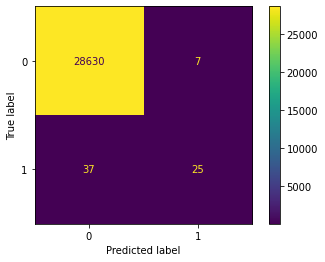

In [80]:
disp.plot()

In [81]:
# Classification Metrics
from sklearn.metrics import classification_report

In [82]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28637
           1       0.78      0.40      0.53        62

    accuracy                           1.00     28699
   macro avg       0.89      0.70      0.77     28699
weighted avg       1.00      1.00      1.00     28699



In [83]:
#min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
#X_after_min_max_scaler = min_max_scaler.fit_transform(X)

In [84]:
#import datetime as dt
#df_train['Time'] = pd.to_datetime(df_train['Time'], format = '%H:%M:%S').dt.time

In [85]:
#df_train.sample(5)

In [86]:
#df_train.info()

In [87]:
#df_train['Hour'] = df_train['Time'].dt.time
#df_train['Time'].head()

In [88]:
#df_train['Time'] = df_train['Time'].astype(int)

In [89]:
#X = df_train.drop(['FraudResult'], axis = 'columns')
#y = df_train.FraudResult

In [90]:
# Importing the test dataset
df_test = pd.read_csv('test.csv')
df_test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2


In [91]:
df_test.shape

(45019, 15)

In [92]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45019 entries, 0 to 45018
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         45019 non-null  object 
 1   BatchId               45019 non-null  object 
 2   AccountId             45019 non-null  object 
 3   SubscriptionId        45019 non-null  object 
 4   CustomerId            45019 non-null  object 
 5   CurrencyCode          45019 non-null  object 
 6   CountryCode           45019 non-null  int64  
 7   ProviderId            45019 non-null  object 
 8   ProductId             45019 non-null  object 
 9   ProductCategory       45019 non-null  object 
 10  ChannelId             45019 non-null  object 
 11  Amount                45019 non-null  float64
 12  Value                 45019 non-null  int64  
 13  TransactionStartTime  45019 non-null  object 
 14  PricingStrategy       45019 non-null  int64  
dtypes: float64(1), int6

In [93]:
df_test.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
dtype: int64

In [94]:
df_test['TransactionId'] = df_test['TransactionId'].str.strip('TransactionId_')
df_test['BatchId'] = df_test['BatchId'].str.strip('BatchId_')
df_test['AccountId'] = df_test['AccountId'].str.strip('AccountId_')
df_test['SubscriptionId'] = df_test['SubscriptionId'].str.strip('SubscriptionId_')
df_test['CustomerId'] = df_test['CustomerId'].str.strip('CustomerId_')
df_test['ProviderId'] = df_test['ProviderId'].str.strip('ProviderId_')
df_test['ProductId'] = df_test['ProductId'].str.strip('ProductId_')
df_test['ChannelId'] = df_test['ChannelId'].str.strip('ChannelId_')

In [95]:
df_test['TransactionId'] = df_test['TransactionId'].astype(int)
df_test['BatchId'] = df_test['BatchId'].astype(int)
df_test['AccountId'] = df_test['AccountId'].astype(int)
df_test['SubscriptionId'] = df_test['SubscriptionId'].astype(int)
df_test['CustomerId'] = df_test['CustomerId'].astype(int)
df_test['ProviderId'] = df_test['ProviderId'].astype(int)
df_test['ProductId'] = df_test['ProductId'].astype(int)
df_test['ChannelId'] = df_test['ChannelId'].astype(int)

In [96]:
df_test

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,50600,35028,2441,4426,2857,UGX,256,5,3,airtime,3,1000.0,1000,2019-02-13T10:01:40Z,4
1,95109,45139,3439,2643,3874,UGX,256,5,15,financial_services,3,2000.0,2000,2019-02-13T10:02:12Z,2
2,47357,74887,4841,3829,2857,UGX,256,4,6,financial_services,2,-50.0,50,2019-02-13T10:02:30Z,2
3,28185,11025,2685,4626,3105,UGX,256,5,10,airtime,3,3000.0,3000,2019-02-13T10:02:38Z,4
4,22140,29804,4841,3829,3105,UGX,256,4,6,financial_services,2,-60.0,60,2019-02-13T10:02:58Z,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45014,116198,117348,4841,3829,5225,UGX,256,4,6,financial_services,3,-5000.0,5000,2019-03-14T23:56:28Z,2
45015,24829,53630,4803,1738,5272,UGX,256,3,10,airtime,3,10000.0,10000,2019-03-14T23:57:38Z,1
45016,102920,112209,4817,4613,5286,UGX,256,3,10,airtime,3,10000.0,10000,2019-03-14T23:59:17Z,1
45017,128439,58734,4841,3829,5286,UGX,256,4,6,financial_services,3,-5000.0,5000,2019-03-14T23:59:39Z,2


In [97]:
df_test['TransactionStartTime'] = pd.to_datetime(df_test['TransactionStartTime'])

In [98]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45019 entries, 0 to 45018
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         45019 non-null  int64              
 1   BatchId               45019 non-null  int64              
 2   AccountId             45019 non-null  int64              
 3   SubscriptionId        45019 non-null  int64              
 4   CustomerId            45019 non-null  int64              
 5   CurrencyCode          45019 non-null  object             
 6   CountryCode           45019 non-null  int64              
 7   ProviderId            45019 non-null  int64              
 8   ProductId             45019 non-null  int64              
 9   ProductCategory       45019 non-null  object             
 10  ChannelId             45019 non-null  int64              
 11  Amount                45019 non-null  float64            
 12  Valu

In [99]:
# Extracting year from TransactionStartTime
df_test['Year'] = df_test['TransactionStartTime'].dt.year
df_test['Year'].head()

0    2019
1    2019
2    2019
3    2019
4    2019
Name: Year, dtype: int64

In [100]:
df_test['Year'].unique()

array([2019])

In [101]:
len(df_test['Year'].unique())

1

In [102]:
df_test['Year'].value_counts()

2019    45019
Name: Year, dtype: int64

In [103]:
# Extracting month from TransactionStartTime
df_test['Month'] = df_test['TransactionStartTime'].dt.month
df_test['Month'].head()

0    2
1    2
2    2
3    2
4    2
Name: Month, dtype: int64

In [104]:
df_test['Month'].unique()

array([2, 3])

In [105]:
len(df_test['Month'].unique())

2

In [106]:
df_test['Month'].value_counts()

2    23653
3    21366
Name: Month, dtype: int64

In [107]:
# Extracting Day from TransactionStartTime
df_test['Day'] = df_test['TransactionStartTime'].dt.day
df_test['Day'].head()

0    13
1    13
2    13
3    13
4    13
Name: Day, dtype: int64

In [108]:
df_test['Day'].unique()

array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [109]:
len(df_test['Day'].unique())

28

In [110]:
df_test['Day'].value_counts()

14    4329
1     3925
22    3460
8     3162
15    2927
6     2841
13    1890
21    1835
7     1308
16    1296
5     1295
25    1186
17    1138
27    1110
18    1090
26    1076
4     1076
28    1073
23    1041
24    1032
19    1005
12     934
2      928
3      848
10     837
9      809
11     785
20     783
Name: Day, dtype: int64

In [111]:
# Extracting Time from TransactionStartTime
df_test['Time'] = df_test['TransactionStartTime'].dt.time
df_test['Time'].head()

0    10:01:40
1    10:02:12
2    10:02:30
3    10:02:38
4    10:02:58
Name: Time, dtype: object

In [112]:
df_test['Time'].unique

<bound method Series.unique of 0        10:01:40
1        10:02:12
2        10:02:30
3        10:02:38
4        10:02:58
           ...   
45014    23:56:28
45015    23:57:38
45016    23:59:17
45017    23:59:39
45018    23:59:51
Name: Time, Length: 45019, dtype: object>

In [113]:
len(df_test['Time'].unique())

32559

In [114]:
df_test['Time'].value_counts()

07:08:35    7
16:54:35    7
13:30:45    7
17:37:10    6
17:21:12    6
           ..
16:06:39    1
16:05:29    1
16:05:26    1
16:03:50    1
23:59:51    1
Name: Time, Length: 32559, dtype: int64

In [115]:
df_test.sample(5)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,Year,Month,Day,Time
41621,109172,38546,2198,3834,2607,UGX,256,6,3,airtime,3,500.0,500,2019-03-12 06:39:30+00:00,2,2019,3,12,06:39:30
1227,57010,117340,4841,3829,3164,UGX,256,4,6,financial_services,3,-5000.0,5000,2019-02-14 09:29:53+00:00,2,2019,2,14,09:29:53
2306,55306,54522,4840,3829,4464,UGX,256,4,6,financial_services,2,-2000.0,2000,2019-02-14 14:33:02+00:00,2,2019,2,14,14:33:02
15158,125616,121103,4593,3866,5057,UGX,256,5,3,airtime,3,1000.0,1000,2019-02-22 11:23:33+00:00,4,2019,2,22,11:23:33
1747,70550,126911,398,3350,4898,UGX,256,4,9,financial_services,5,-500.0,500,2019-02-14 12:20:38+00:00,0,2019,2,14,12:20:38


In [116]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45019 entries, 0 to 45018
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         45019 non-null  int64              
 1   BatchId               45019 non-null  int64              
 2   AccountId             45019 non-null  int64              
 3   SubscriptionId        45019 non-null  int64              
 4   CustomerId            45019 non-null  int64              
 5   CurrencyCode          45019 non-null  object             
 6   CountryCode           45019 non-null  int64              
 7   ProviderId            45019 non-null  int64              
 8   ProductId             45019 non-null  int64              
 9   ProductCategory       45019 non-null  object             
 10  ChannelId             45019 non-null  int64              
 11  Amount                45019 non-null  float64            
 12  Valu

In [117]:
df_test['CurrencyCode'].value_counts()

UGX    45019
Name: CurrencyCode, dtype: int64

In [118]:
df_test['CurrencyCode'].unique()

array(['UGX'], dtype=object)

In [119]:
df_test['CountryCode'].value_counts()

256    45019
Name: CountryCode, dtype: int64

In [120]:
df_test['CountryCode'].unique()

array([256])

In [121]:
# Applyting the same pre procesing methods as with the train dataset
df_test = df_test.drop(['TransactionStartTime', 'CountryCode', 'CurrencyCode'], axis = 'columns')
df_test.sample(5)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,Year,Month,Day,Time
25745,125865,73290,4841,3829,955,4,6,financial_services,3,-5000.0,5000,2,2019,3,1,13:56:48
9906,46520,111375,4840,3829,4861,4,6,financial_services,2,-100.0,100,2,2019,2,18,18:51:03
26201,90525,9637,614,4761,954,6,10,airtime,3,4500.0,4500,2,2019,3,1,15:34:30
10332,110088,121134,4840,3829,665,4,6,financial_services,2,-20.0,20,2,2019,2,19,09:42:35
8718,82408,27240,4840,3829,734,4,6,financial_services,2,-50.0,50,2,2019,2,17,17:39:54


In [122]:
df_test['ProductCategory'].unique()

array(['airtime', 'financial_services', 'tv', 'utility_bill',
       'data_bundles', 'movies', 'ticket', 'retail', 'transport'],
      dtype=object)

In [123]:
df_test['ProductCategory'].value_counts()

financial_services    21700
airtime               20923
data_bundles            914
utility_bill            740
tv                      459
retail                  184
movies                   78
ticket                   16
transport                 5
Name: ProductCategory, dtype: int64

In [124]:
len(df_test['ProductCategory'].unique())

9

In [125]:
ProductCategory_testdummy = pd.get_dummies(df_test.ProductCategory, drop_first = True)
ProductCategory_testdummy

,data_bundles,financial_services,movies,retail,ticket,transport,tv,utility_bill
0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
45014,0,1,0,0,0,0,0,0
45015,0,0,0,0,0,0,0,0
45016,0,0,0,0,0,0,0,0
45017,0,1,0,0,0,0,0,0


In [126]:
df_test = pd.concat([df_test, ProductCategory_testdummy], axis= 'columns')
df_test

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,...,Day,Time,data_bundles,financial_services,movies,retail,ticket,transport,tv,utility_bill
0,50600,35028,2441,4426,2857,5,3,airtime,3,1000.0,...,13,10:01:40,0,0,0,0,0,0,0,0
1,95109,45139,3439,2643,3874,5,15,financial_services,3,2000.0,...,13,10:02:12,0,1,0,0,0,0,0,0
2,47357,74887,4841,3829,2857,4,6,financial_services,2,-50.0,...,13,10:02:30,0,1,0,0,0,0,0,0
3,28185,11025,2685,4626,3105,5,10,airtime,3,3000.0,...,13,10:02:38,0,0,0,0,0,0,0,0
4,22140,29804,4841,3829,3105,4,6,financial_services,2,-60.0,...,13,10:02:58,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45014,116198,117348,4841,3829,5225,4,6,financial_services,3,-5000.0,...,14,23:56:28,0,1,0,0,0,0,0,0
45015,24829,53630,4803,1738,5272,3,10,airtime,3,10000.0,...,14,23:57:38,0,0,0,0,0,0,0,0
45016,102920,112209,4817,4613,5286,3,10,airtime,3,10000.0,...,14,23:59:17,0,0,0,0,0,0,0,0
45017,128439,58734,4841,3829,5286,4,6,financial_services,3,-5000.0,...,14,23:59:39,0,1,0,0,0,0,0,0


In [127]:
df_test = df_test.drop(['ProductCategory', 'Time'], axis = 'columns')
df_test

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId,Amount,Value,...,Month,Day,data_bundles,financial_services,movies,retail,ticket,transport,tv,utility_bill
0,50600,35028,2441,4426,2857,5,3,3,1000.0,1000,...,2,13,0,0,0,0,0,0,0,0
1,95109,45139,3439,2643,3874,5,15,3,2000.0,2000,...,2,13,0,1,0,0,0,0,0,0
2,47357,74887,4841,3829,2857,4,6,2,-50.0,50,...,2,13,0,1,0,0,0,0,0,0
3,28185,11025,2685,4626,3105,5,10,3,3000.0,3000,...,2,13,0,0,0,0,0,0,0,0
4,22140,29804,4841,3829,3105,4,6,2,-60.0,60,...,2,13,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45014,116198,117348,4841,3829,5225,4,6,3,-5000.0,5000,...,3,14,0,1,0,0,0,0,0,0
45015,24829,53630,4803,1738,5272,3,10,3,10000.0,10000,...,3,14,0,0,0,0,0,0,0,0
45016,102920,112209,4817,4613,5286,3,10,3,10000.0,10000,...,3,14,0,0,0,0,0,0,0,0
45017,128439,58734,4841,3829,5286,4,6,3,-5000.0,5000,...,3,14,0,1,0,0,0,0,0,0


In [128]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45019 entries, 0 to 45018
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TransactionId       45019 non-null  int64  
 1   BatchId             45019 non-null  int64  
 2   AccountId           45019 non-null  int64  
 3   SubscriptionId      45019 non-null  int64  
 4   CustomerId          45019 non-null  int64  
 5   ProviderId          45019 non-null  int64  
 6   ProductId           45019 non-null  int64  
 7   ChannelId           45019 non-null  int64  
 8   Amount              45019 non-null  float64
 9   Value               45019 non-null  int64  
 10  PricingStrategy     45019 non-null  int64  
 11  Year                45019 non-null  int64  
 12  Month               45019 non-null  int64  
 13  Day                 45019 non-null  int64  
 14  data_bundles        45019 non-null  uint8  
 15  financial_services  45019 non-null  uint8  
 16  movi

In [129]:
colsT = df_test.columns
colsT

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'ProviderId', 'ProductId', 'ChannelId', 'Amount', 'Value',
       'PricingStrategy', 'Year', 'Month', 'Day', 'data_bundles',
       'financial_services', 'movies', 'retail', 'ticket', 'transport', 'tv',
       'utility_bill'],
      dtype='object')

In [130]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [131]:
df_test = scaler.fit_transform(df_test)

In [132]:
df_test

array([[0.35964968, 0.25110581, 0.50320845, ..., 0.        , 0.        ,
        0.        ],
       [0.67605013, 0.32359077, 0.70979093, ..., 0.        , 0.        ,
        0.        ],
       [0.33659622, 0.53685184, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.73157607, 0.80441032, 0.99503208, ..., 0.        , 0.        ,
        0.        ],
       [0.91298259, 0.42105225, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.3264308 , 0.70475515, 0.94866487, ..., 0.        , 0.        ,
        0.        ]])

In [133]:
df_test = pd.DataFrame(df_test, columns=[colsT])
df_test

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId,Amount,Value,...,Month,Day,data_bundles,financial_services,movies,retail,ticket,transport,tv,utility_bill
0,0.359650,0.251106,0.503208,0.915202,0.382214,0.8,0.076923,0.50,0.208417,0.000105,...,0.0,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.676050,0.323591,0.709791,0.546432,0.519037,0.8,0.538462,0.50,0.208500,0.000210,...,0.0,0.444444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.336596,0.536852,1.000000,0.791727,0.382214,0.6,0.192308,0.25,0.208329,0.000005,...,0.0,0.444444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.200309,0.079030,0.553716,0.956567,0.415579,0.8,0.346154,0.50,0.208583,0.000316,...,0.0,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.157337,0.213655,1.000000,0.791727,0.415579,0.6,0.192308,0.25,0.208328,0.000006,...,0.0,0.444444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45014,0.825965,0.841251,1.000000,0.791727,0.700794,0.6,0.192308,0.50,0.207917,0.000526,...,1.0,0.481481,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
45015,0.176452,0.384462,0.992134,0.359255,0.707117,0.4,0.346154,0.50,0.209167,0.001052,...,1.0,0.481481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45016,0.731576,0.804410,0.995032,0.953878,0.709000,0.4,0.346154,0.50,0.209167,0.001052,...,1.0,0.481481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45017,0.912983,0.421052,1.000000,0.791727,0.709000,0.6,0.192308,0.50,0.207917,0.000526,...,1.0,0.481481,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
X = df_train.drop(['FraudResult'], axis = 'columns')
y = df_train.FraudResult

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [135]:
#x = df_train
#y = df_test

In [136]:
#x_train = df_train
#y_train = df_train
#x_test = df_test
#y_test = df_test

In [137]:
X_test = df_test

In [138]:
from sklearn.linear_model import LogisticRegression

fraudmodel = LogisticRegression()

fraudmodel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [139]:
y_pred_test = fraudmodel.predict(df_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [140]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [141]:
y_pred_test2 = fraudmodel.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [142]:
y_pred_test2

array([0, 0, 0, ..., 0, 0, 0])